In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import datetime

import pylab  as pl 
import pandas as pd
import numpy  as np

In [2]:
index = pd.read_json("https://archive.analytics.mybinder.org/index.jsonl",
                     lines=True)

In [3]:
# get all days since start of June 2020.
now = datetime.datetime.now()
n   = (now - datetime.datetime(2020, 7, 1)).days

frames = []

count  = 0

for idx, day in index.sort_index(ascending=False).iterrows():
    df = pd.read_json("https://archive.analytics.mybinder.org/{}".format(day['name']), lines=True)
    frames.append(df)

    if len(frames) > n:
        break

    print(count, n)
    
    count += 1
        
print(f"Fetched data for {n} days.")

0 230
1 230
2 230
3 230
4 230
5 230
6 230
7 230
8 230
9 230
10 230
11 230
12 230
13 230
14 230
15 230
16 230
17 230
18 230
19 230
20 230
21 230
22 230
23 230
24 230
25 230
26 230
27 230
28 230
29 230
30 230
31 230
32 230
33 230
34 230
35 230
36 230
37 230
38 230
39 230
40 230
41 230
42 230
43 230
44 230
45 230
46 230
47 230
48 230
49 230
50 230
51 230
52 230
53 230
54 230
55 230
56 230
57 230
58 230
59 230
60 230
61 230
62 230
63 230
64 230
65 230
66 230
67 230
68 230
69 230
70 230
71 230
72 230
73 230
74 230
75 230
76 230
77 230
78 230
79 230
80 230
81 230
82 230
83 230
84 230
85 230
86 230
87 230
88 230
89 230
90 230
91 230
92 230
93 230
94 230
95 230
96 230
97 230
98 230
99 230
100 230
101 230
102 230
103 230
104 230
105 230
106 230
107 230
108 230
109 230
110 230
111 230
112 230
113 230
114 230
115 230
116 230
117 230
118 230
119 230
120 230
121 230
122 230
123 230
124 230
125 230
126 230
127 230
128 230
129 230
130 230
131 230
132 230
133 230
134 230
135 230
136 230
137 230
138 23

In [4]:
df = pd.concat(frames)

In [5]:
# make it easier to grab the ref
def get_repo(spec):
    s = spec.rsplit("/", 1)[0]
    if s.endswith('.git'):
        s = s[:-4]
    return s

df['repo'] = df['spec'].apply(get_repo) #lambda s: s.rsplit("/", 1)[0].replace(".git", ""))
df['org'] = df['spec'].apply(lambda s: s.split("/", 1)[0])

In [6]:
# take a look at the data, does it look sensible?
df.sample(10)

,timestamp,schema,version,provider,spec,ref,status,origin,repo,org
14240,2020-11-05 13:17:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gke.mybinder.org,ipython/ipython-in-depth,ipython
11046,2020-12-18 12:50:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/master,79184a07d47cf03787b39cfc345da98794d76554,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
5109,2020-10-04 09:22:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jamesdbrock/the-universal-data-structure/main,d67d11d9013f538793958921e1d8d4bf547ec097,success,gke.mybinder.org,jamesdbrock/the-universal-data-structure,jamesdbrock
9958,2020-09-05 13:35:00+00:00,binderhub.jupyter.org/launch,4,GitHub,yacchin1205/jupyter-with-jenkins/master,3862dc99429713748425f8b44f20ab12b62a7180,success,gke.mybinder.org,yacchin1205/jupyter-with-jenkins,yacchin1205
4710,2020-07-20 07:42:00+00:00,binderhub.jupyter.org/launch,4,GitHub,DavidVargasMora/TACTests/master,2acdcac769d550c2dc080840727c5eee7cc02c40,success,gke.mybinder.org,DavidVargasMora/TACTests,DavidVargasMora
5492,2021-01-24 10:18:00+00:00,binderhub.jupyter.org/launch,4,GitHub,binder-examples/r/master,cac6395ad88bdd5581599daed2b2717d3d01e404,success,gke.mybinder.org,binder-examples/r,binder-examples
12480,2020-10-05 12:45:00+00:00,binderhub.jupyter.org/launch,4,GitHub,UGE-IGM/courspython/master,2a6985a8699f26297e0668155db333138a9b63d3,success,gke.mybinder.org,UGE-IGM/courspython,UGE-IGM
13756,2020-09-16 11:55:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/master,6a5d1bed156546125975a2e38a2b2e60b4a12f6d,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
18881,2020-07-08 21:37:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
19817,2021-01-26 16:38:00+00:00,binderhub.jupyter.org/launch,4,GitHub,tbetcke/math0058/HEAD,b0f3bb948e071c0319352d390c963cd2a64db784,success,gke.mybinder.org,tbetcke/math0058,tbetcke


In [7]:
df = df.drop(columns=['schema', 'version', 'spec', 'ref'])

In [8]:
df.sample(10)

,timestamp,provider,status,origin,repo,org
13581,2021-01-13 14:40:00+00:00,GitHub,success,gesis.mybinder.org,MonkeyWrenchGang/r_session_1,MonkeyWrenchGang
6806,2020-08-16 11:00:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
12751,2020-08-23 19:23:00+00:00,GitHub,success,ovh.mybinder.org,meatballs/sql_python_notebooks,meatballs
21283,2020-09-16 17:24:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
17234,2020-08-12 21:28:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
12852,2020-10-28 13:08:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
21709,2020-08-26 22:37:00+00:00,GitHub,success,gke.mybinder.org,ipython/ipython-in-depth,ipython
7018,2020-09-10 07:25:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
17102,2020-08-06 20:59:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
12613,2021-01-09 19:35:00+00:00,GitHub,success,gke.mybinder.org,ipython/ipython-in-depth,ipython


In [9]:
np.any(df['repo'] == 'michaelJwilson/DESI-HighSchool')

True

In [10]:
ds = df[df['repo'] == 'michaelJwilson/DESI-HighSchool']

In [11]:
ds['pd_timestamp'] = pd.to_datetime(ds.timestamp)

/Users/MJWilson/opt/miniconda3/envs/desihigh/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
ds.sort_values(by='pd_timestamp')

,timestamp,provider,status,origin,repo,org,pd_timestamp
2953,2020-07-09 04:59:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 04:59:00+00:00
2980,2020-07-09 05:03:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:03:00+00:00
3015,2020-07-09 05:04:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:04:00+00:00
3108,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
3107,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
...,...,...,...,...,...,...,...
29088,2021-02-11 23:20:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2021-02-11 23:20:00+00:00
11960,2021-02-13 17:07:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2021-02-13 17:07:00+00:00
21183,2021-02-15 19:13:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2021-02-15 19:13:00+00:00
10794,2021-02-16 11:24:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2021-02-16 11:24:00+00:00


In [13]:
daily = ds.set_index("timestamp").resample('D').count()

In [14]:
daily.head()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-07-09 00:00:00+00:00,9,9,9,9,9,9
2020-07-10 00:00:00+00:00,0,0,0,0,0,0
2020-07-11 00:00:00+00:00,3,3,3,3,3,3
2020-07-12 00:00:00+00:00,0,0,0,0,0,0
2020-07-13 00:00:00+00:00,11,11,11,11,11,11


In [15]:
daily.tail()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2021-02-12 00:00:00+00:00,0,0,0,0,0,0
2021-02-13 00:00:00+00:00,1,1,1,1,1,1
2021-02-14 00:00:00+00:00,0,0,0,0,0,0
2021-02-15 00:00:00+00:00,1,1,1,1,1,1
2021-02-16 00:00:00+00:00,2,2,2,2,2,2


Text(0.5, 0, '')

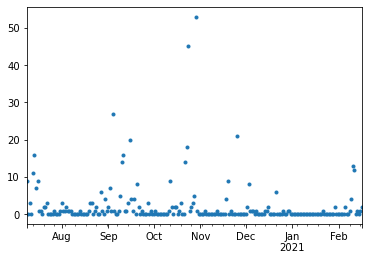

In [16]:
daily['repo'].plot(marker='.', lw=0.)

ax = pl.gca()

ax.set_xlabel('')

In [17]:
np.sum(daily['repo'])

488